In [1]:
import credit

In [2]:
import constant as c

In [3]:
import utils

In [4]:
import pandas

In [5]:
import os

In [6]:
import numpy

# save data from the internet, locally
*unless already done*

In [7]:
train_data_file_path, test_data_file_path = credit.saved_tabular_data_file_paths_from_url(
    data_url=c.data_url,
    redownload=False,
    reextract=True,
)
assert train_data_file_path == c.train_data_file_path
assert test_data_file_path == c.test_data_file_path

final files already there
../data/
  ├ train.csv
  ├ test.csv
  └ downloaded_data.zip


In [8]:
import autogluon.tabular

# load data as a tabular data set
*same ting as a data frame*

In [9]:
train_data = autogluon.tabular.TabularDataset(data=train_data_file_path)

## the target is the "aposteriori lack of payment" of the customer
 - 0 -> zero delay of payment
 - 1 -> difficulties to pay in time

In [11]:
train_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# train model and save it locally
*unless already done*

## metric: ROC AUC
it is specify that the AUC will be the valdiation metric  
so the credit company can have the freedom to say no or adjust the interest/insurance fee according to the ***payment default likelyhood***

In [13]:
if not os.path.exists(c.model_folder_path):
    print(f"{c.model_folder_path} does not exists")
    try:
        predictor = autogluon.tabular.TabularPredictor(
            label='TARGET',
            eval_metric='roc_auc',
            path = c.model_folder_path,
        )
        predictor.fit(
            train_data=train_data,
            presets=[
                'optimize_for_deployment', # will prune not so important sub models
                'medium_quality' # will speed up training
            ],
            time_limit=60*45, # seconds
        )
        assert predictor.path == c.model_folder_path
        print(f"{predictor.predictor_file_name = }")
        predictor.save()
    except Exception as error:
        print(f"somthing went wrong: {error}")
        print(f"removing the folder: {c.model_folder_path}")
        utils.delete_everything_inside_folder(c.model_folder_path)
        utils.delete_empty_folder(c.model_folder_path)
        assert not os.path.exists(c.model_folder_path)
        raise(error)

In [14]:
if os.path.exists(c.model_folder_path):
    predictor = autogluon.tabular.TabularPredictor.load(c.model_folder_path)

# admire the complexity of the model

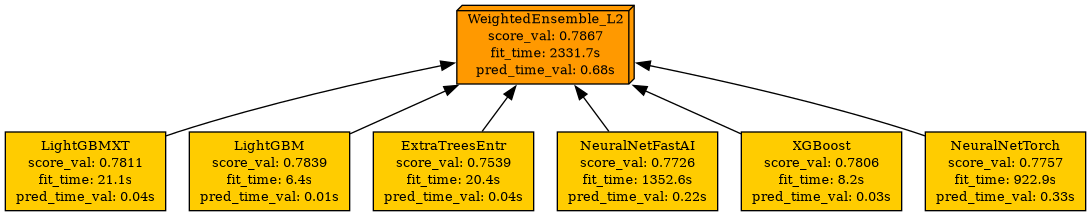

In [15]:
predictor.plot_ensemble_model(filename=c.models_graph_file_name)
utils.show_image_from_path(c.models_graph_file_path)

# perform prediction on test data set for submission

In [16]:
test_data = autogluon.tabular.TabularDataset(data=test_data_file_path)
test_data.head(2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [17]:
test_data.head(4)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [40]:
test_prediction_result = predictor.predict(test_data)
test_prediction_result.head(2)

0    0
1    0
Name: TARGET, dtype: int64

In [39]:
test_probability_prediction_result = predictor.predict_proba(test_data)
test_probability_prediction_result.head(2)

,0,1
0,0.957126,0.042874
1,0.850687,0.149313


## result submission
  - first column is the client ID
  - second column is the client's ***payment default likelihood***

In [20]:
submission_data = pandas.concat(
    objs=[
        test_data['SK_ID_CURR'], # client id
        test_probability_prediction_result[1],# probability client will not pay in time
    ],
    axis=1
).rename(
    columns={
        'SK_ID_CURR': 'SK_ID_CURR', 
        1: 'TARGET'
    },
)
print(f"we output in a column the probability fo a a client (SK_ID_CURR) to be a good payer (target)")
submission_data.head()

we output in a column the probability fo a a client (SK_ID_CURR) to be a good payer (target)


,SK_ID_CURR,TARGET
0,100001,0.042874
1,100005,0.149313
2,100013,0.024527
3,100028,0.040429
4,100038,0.160621


In [21]:
credit.saved_data_frame_path_from_data_frame(
    data_frame=submission_data,
    data_folder_path=c.results_folder_path, 
    # data_frame_file_name='submission.csv', 
    data_frame_file_name=c.submission_file_name, 
    save_index=False,
)

'../results/submission.csv'

# result from kaggle submission

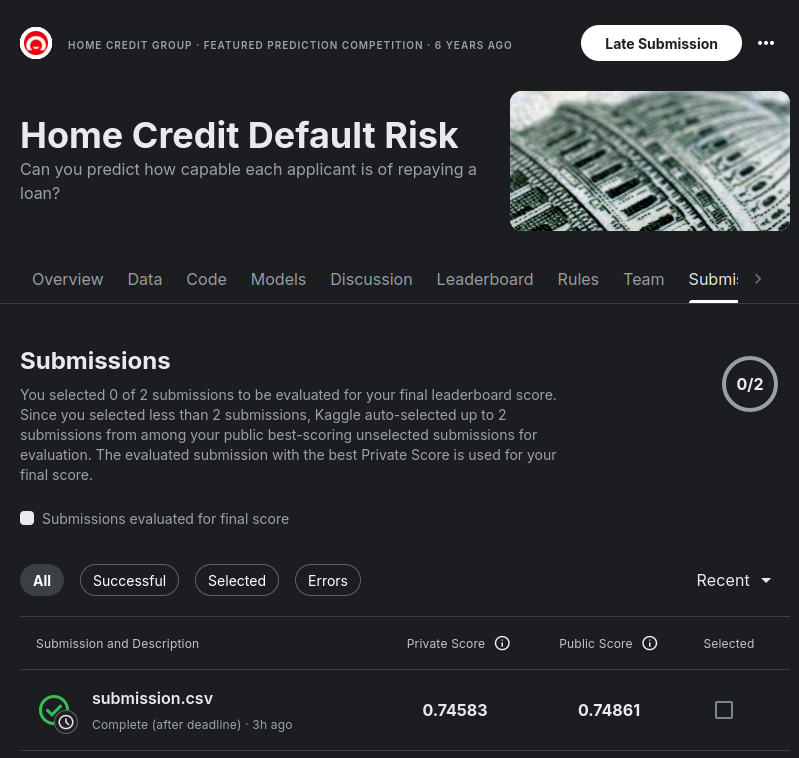

In [43]:
utils.show_image_from_path(c.submission_result_file_path)

# feature importance analysis
which feature (value) weighted the most into the prediciton output

In [ ]:
if not os.path.exists(c.feature_importances_tab_file_path):
    feature_importances = predictor.feature_importance(
        data=train_data,
        subsample_size=1000,
        time_limit=60*20,
    )
    assert c.feature_importances_tab_file_path  == credit.saved_data_frame_path_from_data_frame(
        data_frame=feature_importances,
        data_folder_path=c.dashboard_folder_path,
        data_frame_file_name=c.feature_importances_tab_file_name,
        save_index=True,
    )
feature_importances = pandas.read_csv(
    filepath_or_buffer=c.feature_importances_tab_file_path,
    index_col=0,
)
feature_importances.head(20)

In [ ]:
if not os.path.exists(c.feature_importances_hist_file_path):
    print(f"how the improtance is distributed among features")
    axes = feature_importances['importance'].hist(
        legend=True,
    )
    figure = axes.get_figure()
    figure.savefig(
        c.feature_importances_hist_file_path,
    )
utils.show_image_from_path(c.feature_importances_hist_file_path)

In [26]:
most_important_features = feature_importances[
    feature_importances['importance'] > 0.01
]
most_important_feature_names = most_important_features.index.values

/home/wam/kood/credit-scoring/notebooks/credit.py:556: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis.legend()


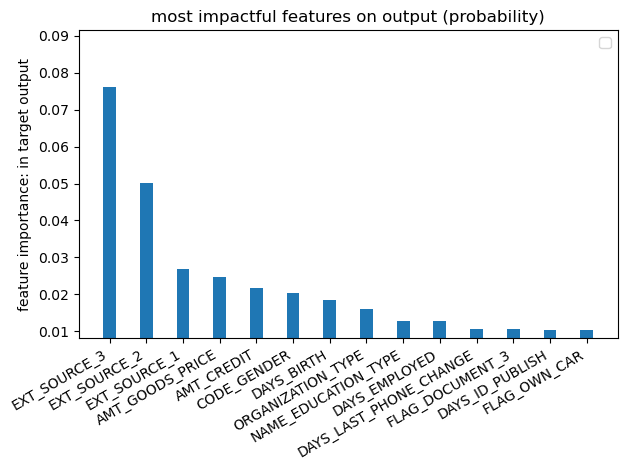

In [27]:
# feature_importances['importance'].plot(kind='bar')
credit.plot_stuff_with_bars(
    labels=most_important_features.index.values, 
    data=most_important_features['importance'],
    label=None,
    y_axis_label='feature importance: in target output',
    chart_title='most impactful features on output (probability)',
    folder_path=c.dashboard_folder_path,
    file_name='most_important_features.png',    
)

In [28]:
bad_payers = train_data[
    train_data['TARGET'] == 1
]
good_payers = train_data[
    train_data['TARGET'] == 0
]

# feature importance at the client scale

## determine "normal profile"
  - of a good payer customer
  - of a bad payer customer
    
define a function that take a population and return a customer data where each column value is the median of its represnting population

In [29]:
def normal_feature_values(data):
    new_data_frame = pandas.DataFrame(columns=data.columns).reindex(range(1))
    for column in data.columns:
        values = data[column].values
        if numpy.issubdtype(values.dtype, numpy.number):
            values = values[~numpy.isnan(values)]
            populations, edges = numpy.histogram(values)
            max_bin_middle_value = edges[numpy.argmax(populations)]+edges[numpy.argmax(populations+1)]/2
            new_data_frame[column]=max_bin_middle_value
            
        if not numpy.issubdtype(values.dtype, numpy.number):
            try:
                uniques, counts = numpy.unique(values, return_counts=True)
            except:
                values = numpy.array( [str(value) for value in values] )
                uniques, counts = numpy.unique(values, return_counts=True)

            most_frequent_index = numpy.argmax(counts)
            most_frequent_value = uniques[most_frequent_index]
            new_data_frame[column]=most_frequent_value

    return new_data_frame

In [30]:
normal_dude = normal_feature_values(train_data)
normal_dude[most_important_feature_names]

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,AMT_GOODS_PRICE,AMT_CREDIT,CODE_GENDER,DAYS_BIRTH,ORGANIZATION_TYPE,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,DAYS_ID_PUBLISH,FLAG_OWN_CAR
0,0.941047,0.89775,0.732946,60750.0,67500.0,F,-21877.5,Business Entity Type 3,Secondary / secondary special,-26868.0,-643.8,1.35,-7556.85,N


In [31]:
normal_good_payer_dude = normal_feature_values(good_payers)
normal_good_payer_dude[most_important_feature_names]

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,AMT_GOODS_PRICE,AMT_CREDIT,CODE_GENDER,DAYS_BIRTH,ORGANIZATION_TYPE,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,DAYS_ID_PUBLISH,FLAG_OWN_CAR
0,0.938912,0.89775,0.732946,60750.0,67500.0,F,-21877.5,Business Entity Type 3,Secondary / secondary special,-26868.0,-643.8,1.35,-7556.85,N


In [32]:
normal_bad_payer_dude = normal_feature_values(bad_payers)
normal_bad_payer_dude[most_important_feature_names]

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,AMT_GOODS_PRICE,AMT_CREDIT,CODE_GENDER,DAYS_BIRTH,ORGANIZATION_TYPE,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,DAYS_ID_PUBLISH,FLAG_OWN_CAR
0,0.403758,0.852465,0.296448,67500.0,664902.0,F,-16764.0,Business Entity Type 3,Secondary / secondary special,-24103.5,-610.5,1.35,-6517.35,N


In [33]:
predictor.predict_proba(bad_payers[0:1])[1]

0    0.520779
Name: 1, dtype: float64

## profile individual customer
compare client with the archetype of the other population to highlight detrimental/favorable criteria

In [34]:
def what_feature_is_impactful(srcutinee, referencee, predict_proba, only_those_columns=None):
    mutant_srcutinee = srcutinee.copy()
    columns = pandas.DataFrame(columns=srcutinee.columns) if only_those_columns is None else only_those_columns
    scrutinee_proba = predict_proba(srcutinee)
    how_impactful_it_was = []
    for column in columns:
        old_value = mutant_srcutinee[column].iloc[0]
        referee_value = referencee[column].iloc[0]
        mutant_srcutinee[column] = referencee[column]*-100
        new_proba = predict_proba(mutant_srcutinee)
        how_impactful_it_was.append((scrutinee_proba - new_proba).values[0])
        mutant_srcutinee= srcutinee.copy()
    return how_impactful_it_was, only_those_columns

/home/wam/kood/credit-scoring/notebooks/credit.py:556: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis.legend()


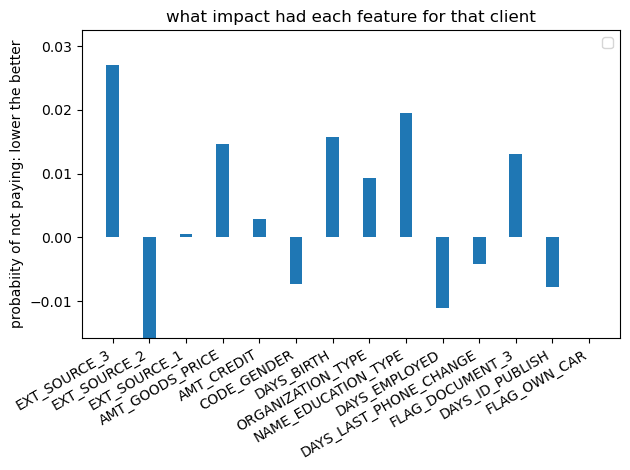

In [35]:
impacts, impactul_columns = what_feature_is_impactful(
    srcutinee=bad_payers[3:4], 
    referencee=normal_good_payer_dude, 
    predict_proba=lambda row:predictor.predict_proba(row)[1] ,
    only_those_columns=most_important_feature_names
)
credit.plot_stuff_with_bars(
        labels=impactul_columns, 
        data=impacts,
        label=None,
        y_axis_label='probabiity of not paying: lower the better',
        chart_title='what impact had each feature for that client',
        folder_path=c.client_output_folder_path,
        file_name='bad_client.png',
)

/home/wam/kood/credit-scoring/notebooks/credit.py:556: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis.legend()


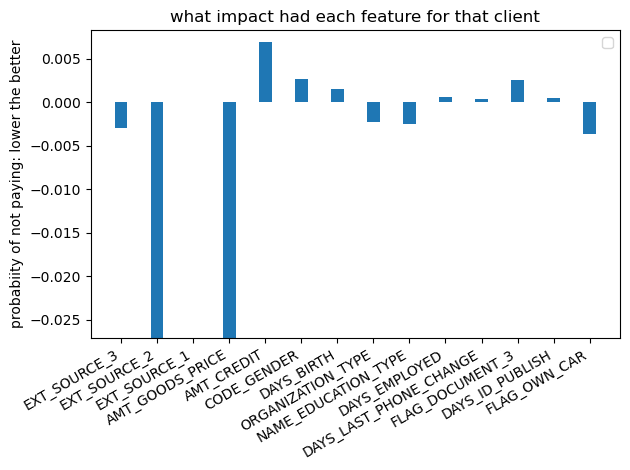

In [42]:
impacts, impactul_columns = what_feature_is_impactful(
    srcutinee=good_payers[6:7], 
    referencee=normal_good_payer_dude, 
    predict_proba=lambda row:predictor.predict_proba(row)[1] ,
    only_those_columns=most_important_feature_names
)
credit.plot_stuff_with_bars(
        labels=impactul_columns, 
        data=impacts,
        label=None,
        y_axis_label='probabiity of not paying: lower the better',
        chart_title='what impact had each feature for that client',
        folder_path=c.client_output_folder_path,
        file_name='good_client.png',
)

### a client from the test data set

/home/wam/kood/credit-scoring/notebooks/credit.py:556: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis.legend()


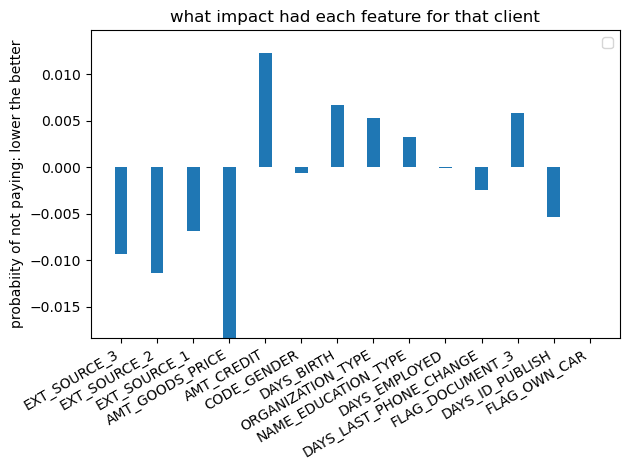

In [41]:
impacts, impactul_columns = what_feature_is_impactful(
    srcutinee=test_data[3:4], 
    referencee=normal_bad_payer_dude, 
    predict_proba=lambda row:predictor.predict_proba(row)[1] ,
    only_those_columns=most_important_feature_names
)
credit.plot_stuff_with_bars(
        labels=impactul_columns, 
        data=impacts,
        label=None,
        y_axis_label='probabiity of not paying: lower the better',
        chart_title='what impact had each feature for that client',
        folder_path=c.client_output_folder_path,
        file_name='test_client.png',
)